In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
# Load the data from the CSV file
data = pd.read_csv("/content/new1.csv")

# Extract the features and target
X = data.iloc[:, :-1]  # Independent variables (all columns except the last one)
y = data.iloc[:, -1]   # Dependent variable (last column)

In [4]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X)

In [5]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the transformed features
model.fit(X_poly, y)

LinearRegression()

In [6]:
# Make predictions using the model
y_pred = model.predict(X_poly)

# Sort X_poly and y_pred based on X_poly for smoother plotting
sorted_zip = sorted(zip(X_poly[:, 1], y_pred))
X_poly_sorted, y_pred_sorted = zip(*sorted_zip)

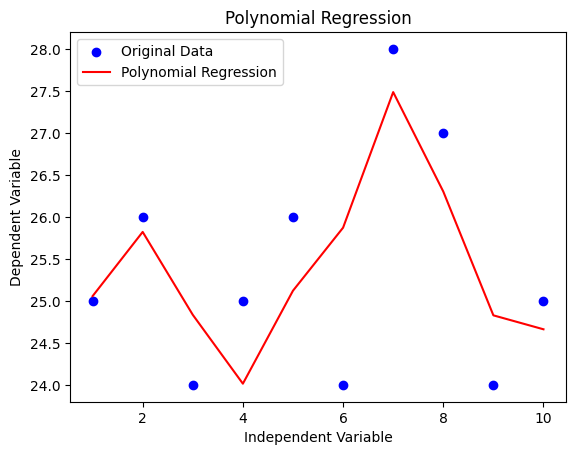

In [7]:
plt.scatter(X_poly[:, 1], y, label="Original Data", color='b')
plt.plot(X_poly_sorted, y_pred_sorted, label="Polynomial Regression", color='r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.legend()
plt.title("Polynomial Regression")
plt.show()